In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Modules**

In [3]:
import pandas as pd
import numpy as np
import warnings
import datetime
# import seaborn as sns
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy
## for deep learning
# import minisom
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.metrics import classification_report
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from geopy.distance import great_circle
from sklearn.cluster import DBSCAN as dbscan

## **Reading data into Dataframe with panda**

In [4]:
accident = pd.read_csv('/content/drive/MyDrive/RsAccident2019.csv')
casualities = pd.read_csv("/content/drive/MyDrive/RsCasualities2019.csv")
Vehicles = pd.read_csv("/content/drive/MyDrive/RsVehicles2019.csv")


In [5]:
accident.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [6]:
#To get informations on the datas which also include the not null counts
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [7]:
#changing the accident index to string
accident['Accident_Index'] = accident['Accident_Index'].astype(str)
Vehicles['Accident_Index'] = Vehicles['Accident_Index'].astype(str)
casualities['Accident_Index'] = casualities['Accident_Index'].astype(str)


In [8]:
# import sweetviz as sv

# my_report = sv.analyze(accident)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [9]:
accident.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [10]:
Vehicles.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

In [11]:
#No nan values detected
casualities.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

##**Cleaning**

In [12]:
#find the frequent occuring time :mode
freq_time = accident["Time"].mode()

In [13]:
#inputing the nan values of time with mode
accident["Time"] = accident["Time"].fillna(freq_time[0])

## **Using ffill and bfill feature of panda to fill up the nan values**

In [14]:
# df.fillna(method="ffill")
# Location_Easting_OSGR
# Location_Northing_OSGR
accident["Longitude"].fillna(method="ffill",inplace=True)
accident["Latitude"].fillna(method="bfill",inplace=True)
accident["Location_Easting_OSGR"].fillna(method="bfill",inplace=True)
accident["Location_Northing_OSGR"].fillna(method="ffill",inplace=True)
accident["LSOA_of_Accident_Location"].replace(np.nan, "unknown", inplace=True)

In [15]:
accident.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [16]:
# accident['converted_time'] = pd.DatetimeIndex(accident['Time'])

In [17]:
# accident['decimal_time'] = accident["converted_time"].dt.hour +  accident["converted_time"].dt.minute/60.

## **Rounding up the hour to the nearest hour**

In [18]:
accident['Converted_Time'] = pd.to_datetime(accident['Time'], format = '%H:%M').dt.hour # convert time to the nearest hour

## **Decoding datas with their Labels to be able analyse question B and C with respective tags**

In [19]:
 !pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [20]:
#Reading the variable lookup excel that coins each feature labels
var_lookup = pd.read_excel('/content/drive/MyDrive/variable_lookup.xls', sheet_name=None)

In [22]:
#Looking for variables with same lookup keys 
for column in accident.columns:
    if column.lower().replace('_', ' ') in list(
        [each_key.lower() for each_key in var_lookup.keys()]):
        print(column)

Police_Force
Accident_Severity
Day_of_Week
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
Road_Type
Speed_limit
Junction_Detail
Junction_Control
2nd_Road_Class
Light_Conditions
Special_Conditions_at_Site
Carriageway_Hazards


In [23]:
# Renaming columns which does not fall in the pattern
accident=accident.rename(columns = {'Weather_Conditions' : 'Weather',
'Pedestrian_Crossing-Human_Control' : 'Ped Cross - Human',
'Pedestrian_Crossing-Physical_Facilities' : 'Ped Cross - Physical',
'Urban_or_Rural_Area' : 'Urban Rural',
'Road_Surface_Conditions' : 'Road Surface',
'Did_Police_Officer_Attend_Scene_of_Accident' : 'Police Officer Attend'})

In [24]:
accident_decoded = accident.copy()

In [25]:
def create_dict(df_var_look_up):
    ''' To generate a dictionary in the format {code : label}'''
    temp_dict = {}
    # Since Local_Authority_(Highway) has Sentence Case -_-
    df_var_look_up.columns = [
        each_col.lower() for each_col in df_var_look_up.columns
    ]
    for each1, each2 in zip(df_var_look_up['code'], df_var_look_up['label']):
        temp_dict[each1] = each2
    return temp_dict

In [26]:
%%time

# accidents: Dataframe for all accidents in the UK in 2019
# var_lookup: Dictionary of dataframes of the Variable data look up excel

for column in accident.columns:
    for sheet in list(var_lookup.keys()):
        if column.lower().replace('_', ' ') == sheet.lower():
            print(column)
            print(sheet)
            # print(accident[column].map(create_dict(var_lookup[sheet]), na_action='ignore'))
            accident_decoded[column] = accident[column].map(
                create_dict(var_lookup[sheet]), na_action='ignore')
            break

Police_Force
Police Force
Accident_Severity
Accident Severity
Day_of_Week
Day of Week
Local_Authority_(District)
Local Authority (District)
Local_Authority_(Highway)
Local Authority (Highway)
1st_Road_Class
1st Road Class
Road_Type
Road Type
Speed_limit
Speed Limit
Junction_Detail
Junction Detail
Junction_Control
Junction Control
2nd_Road_Class
2nd Road Class
Ped Cross - Human
Ped Cross - Human
Ped Cross - Physical
Ped Cross - Physical
Light_Conditions
Light Conditions
Weather
Weather
Road Surface
Road Surface
Special_Conditions_at_Site
Special Conditions at Site
Carriageway_Hazards
Carriageway Hazards
Urban Rural
Urban Rural
Police Officer Attend
Police Officer Attend
CPU times: user 216 ms, sys: 15.5 ms, total: 232 ms
Wall time: 255 ms


In [27]:
accident_decoded.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Ped Cross - Physical,Light_Conditions,Weather,Road Surface,Special_Conditions_at_Site,Carriageway_Hazards,Urban Rural,Police Officer Attend,LSOA_of_Accident_Location,Converted_Time
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,3,18/02/2019,...,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,E01004762,17
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,Metropolitan Police,Slight,2,1,15/01/2019,...,Data missing or out of range,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,E01003117,21
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,Metropolitan Police,Slight,2,1,01/01/2019,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01000943,1
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,Metropolitan Police,Serious,1,1,01/01/2019,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01000973,1
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,Metropolitan Police,Slight,2,2,01/01/2019,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01000546,0


In [28]:
# accident_decoded.to_csv('UK_accidents_decoded_2019.csv')

### Decoding Labels for Casualities

In [29]:
casualities.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')

In [30]:
for column in casualities.columns:
    if column.lower().replace('_', ' ') in list(
        [each_key.lower() for each_key in var_lookup.keys()]):
        print(column)

Casualty_Class
Sex_of_Casualty
Age_of_Casualty
Casualty_Severity
Car_Passenger
Casualty_Type


In [31]:
casualities=casualities.rename(columns = {'Pedestrian_Location' : 'Ped Location',
'Pedestrian_Movement' : 'Ped Movement',
'Bus_or_Coach_Passenger' : 'Bus Passenger',
'Pedestrian_Road_Maintenance_Worker' : 'Ped Road Maintenance Worker',
'Casualty_Home_Area_Type' : 'Home Area Type',
'Casualty_IMD_Decile' : 'IMD Decile',
})

In [32]:
casualities_decoded = casualities.copy()

In [33]:
%%time

# df_accidents: Dataframe for all accidents in the UK in 2019
# var_lookup: Dictionary of dataframes of the Variable data look up excel

for column in casualities.columns:
    for sheet in list(var_lookup.keys()):
        if column.lower().replace('_', ' ') == sheet.lower():
            print(column)
            print(sheet)
            # print(casualities[column].map(create_dict(var_lookup[sheet]), na_action='ignore'))
            casualities_decoded[column] = casualities[column].map(
                create_dict(var_lookup[sheet]), na_action='ignore')
            break

Casualty_Class
Casualty Class
Sex_of_Casualty
Sex of Casualty
Age_of_Casualty
Age of Casualty
Casualty_Severity
Casualty Severity
Ped Location
Ped Location
Ped Movement
Ped Movement
Car_Passenger
Car Passenger
Bus Passenger
Bus Passenger
Ped Road Maintenance Worker
Ped Road Maintenance Worker
Casualty_Type
Casualty Type
Home Area Type
Home Area Type
IMD Decile
IMD Decile
CPU times: user 130 ms, sys: 10.1 ms, total: 141 ms
Wall time: 152 ms


### Decoding Labels for Vehicles

In [34]:
Vehicles.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'],
      dtype='object')

In [35]:
for column in Vehicles.columns:
    if column.lower().replace('_', ' ') in list(
        [each_key.lower() for each_key in var_lookup.keys()]):
        print(column)

Vehicle_Type
Towing_and_Articulation
Vehicle_Manoeuvre
Junction_Location
Skidding_and_Overturning
Hit_Object_in_Carriageway
Hit_Object_off_Carriageway
1st_Point_of_Impact
Sex_of_Driver


In [36]:
Vehicles=Vehicles.rename(columns = {'Vehicle_Location-Restricted_Lane' : 'Vehicle Location',
'Vehicle_Leaving_Carriageway' : 'Veh Leaving Carriageway',
'Was_Vehicle_Left_Hand_Drive?' : 'Was Vehicle Left Hand Drive',
'Journey_Purpose_of_Driver' : 'Journey Purpose',
'Age_Band_of_Driver' : 'Age Band',
'Propulsion_Code' : 'Vehicle Propulsion Code',
})

In [37]:
vehicles_decoded = Vehicles.copy()

In [38]:
%%time

# df_accidents: Dataframe for all accidents in the UK in 2019
# var_lookup: Dictionary of dataframes of the Variable data look up excel

for column in Vehicles.columns:
    for sheet in list(var_lookup.keys()):
        if column.lower().replace('_', ' ') == sheet.lower():
            print(column)
            print(sheet)
            # print(vehicles[column].map(create_dict(var_lookup[sheet]), na_action='ignore'))
            vehicles_decoded[column] = Vehicles[column].map(
                create_dict(var_lookup[sheet]), na_action='ignore')
            break

Vehicle_Type
Vehicle Type
Towing_and_Articulation
Towing and Articulation
Vehicle_Manoeuvre
Vehicle Manoeuvre
Vehicle Location
Vehicle Location
Junction_Location
Junction Location
Skidding_and_Overturning
Skidding and Overturning
Hit_Object_in_Carriageway
Hit Object in Carriageway
Veh Leaving Carriageway
Veh Leaving Carriageway
Hit_Object_off_Carriageway
Hit Object Off Carriageway
1st_Point_of_Impact
1st Point of Impact
Was Vehicle Left Hand Drive
Was Vehicle Left Hand Drive
Journey Purpose
Journey Purpose
Sex_of_Driver
Sex of Driver
Age Band
Age Band
Vehicle Propulsion Code
Vehicle Propulsion Code
CPU times: user 213 ms, sys: 20.9 ms, total: 234 ms
Wall time: 223 ms


In [39]:
print(vehicles_decoded.shape)
print(Vehicles.shape)

(216381, 23)
(216381, 23)


## **Merging all the Decoded DataFrames for better analysing and Visualization**

In [40]:
mergedDf = vehicles_decoded.merge(casualities_decoded, on="Accident_Index")

In [41]:
all_datas = mergedDf.merge(accident_decoded, on="Accident_Index")

In [42]:
all_datas.shape

(295579, 70)

In [43]:
all_datas.to_csv("merged.csv")

## **Visualizations**







In [44]:
import seaborn as sns

## **a)**
i)Number of Accidents per Day of the Week

<function matplotlib.pyplot.show>

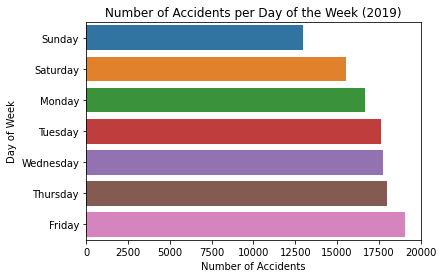

In [45]:
sns.barplot(x='Accident_Index', y='Day_of_Week', data=accident_decoded.groupby('Day_of_Week')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index'))
plt.title("Number of Accidents per Day of the Week (2019)")
plt.ylabel("Day of Week")
plt.xlabel("Number of Accidents")
plt.show

## **ii)Number of Accidents per Time of the day**

In [46]:
# from time import time
# #Function to get the age range of the population in the town

def TimeBand(time):
  if time  == 6 and  time < 10:
    return 'Morning Rush'
  elif time == 10 and  time < 12:
    return 'Day'
  elif time == 12 and  time < 14:
    return 'Lunch Rush'
  elif time == 14 and  time <16:
    return 'Afternoon'
  elif time == 16 and time < 18 :
    return 'After Work Rush'
  elif time == 18 and time < 22:
    return 'Evening'
  else :
    return "Night"


In [47]:
#Creating a new column "Time Band"
accident_decoded['Time_Group'] = accident_decoded['Converted_Time'].apply(TimeBand)

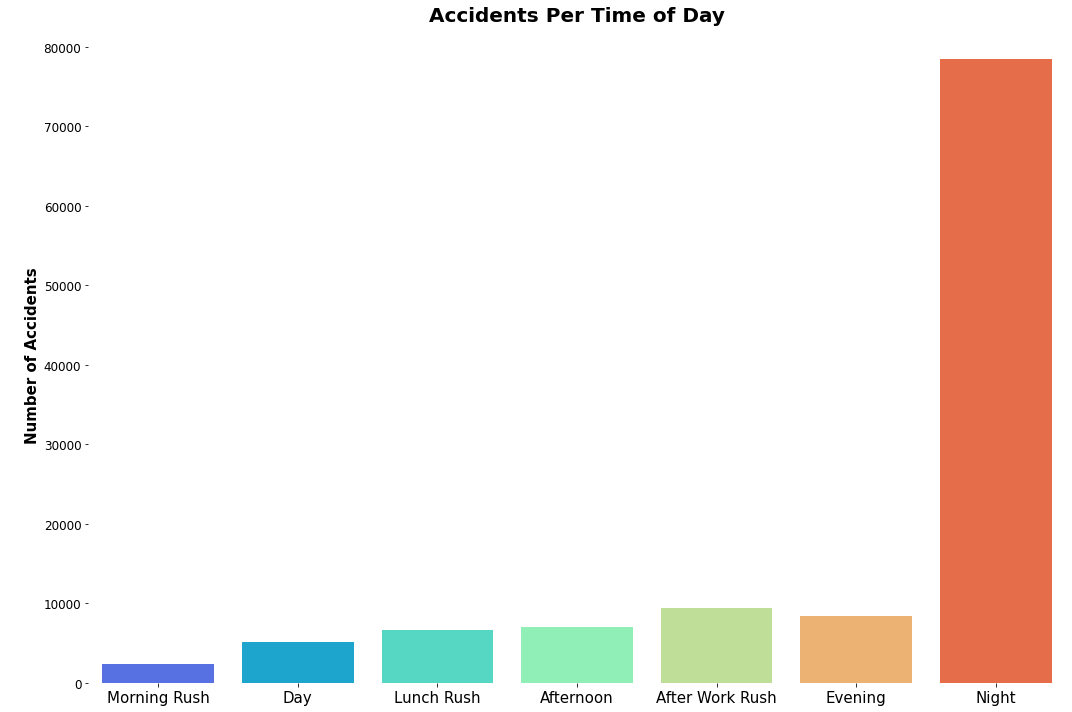

In [48]:
#"Morning Rush (6am-10am)", "Day (10am-12pm)", "Lunch Rush (12pm-14pm)","Afternoon (14pm-16pm)",
#"After Work Rush (16pm-18pm)", "Evening (18pm-22pm)", "Night (22pm-6am)"
accidentspertod = accident_decoded.groupby(['Time_Group'])['Accident_Index'].count()

# prepare plot
# plt.style.use('dark_background')
plt.figure(figsize=(15,10))
tod=["Morning Rush", "Day", "Lunch Rush", "Afternoon",
     "After Work Rush", "Evening", "Night"]
sns.barplot(accidentspertod.index,accidentspertod.values, order=tod, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentspertod.png')


In [49]:
accident_decoded["Time_Group"].value_counts()

Night              78538
After Work Rush     9462
Evening             8347
Afternoon           6994
Lunch Rush          6601
Day                 5190
Morning Rush        2404
Name: Time_Group, dtype: int64

## **(b)	For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?**

In [50]:
acc_vec = accident_decoded.merge(vehicles_decoded, on="Accident_Index")

In [51]:
acc_vec.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey Purpose,Sex_of_Driver,Age_of_Driver,Age Band,Engine_Capacity_(CC),Vehicle Propulsion Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,3,18/02/2019,...,Not known,Male,58,56 - 65,-1,NaN,-1,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,3,18/02/2019,...,Not known,Not known,-1,Data missing or out of range,-1,NaN,-1,2,1,2
2,2019010152270,530219.0,172463.0,-0.127949,51.436208,Metropolitan Police,Slight,2,1,15/01/2019,...,Not known,Female,24,21 - 25,-1,NaN,-1,3,1,3
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,Metropolitan Police,Slight,2,1,15/01/2019,...,Not known,Not known,-1,Data missing or out of range,-1,NaN,-1,6,1,6
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,Metropolitan Police,Slight,2,1,01/01/2019,...,Not known,Male,45,36 - 45,-1,NaN,-1,4,1,4


In [52]:
#dataframe of all motocycles accident
motorbikes = acc_vec.loc[(acc_vec['Vehicle_Type'] == 'Motorcycle 50cc and under') | (acc_vec['Vehicle_Type'] == "Motorcycle 125cc and under") | (acc_vec['Vehicle_Type'] == "Motorcycle over 125cc and up to 500cc") | (acc_vec['Vehicle_Type'] == "Motorcycle over 500cc") | (acc_vec['Vehicle_Type'] == "Electric motorcycle") | (acc_vec['Vehicle_Type'] == "Motorcycle - unknown cc")]

# **Motocycle accident per days of the week**

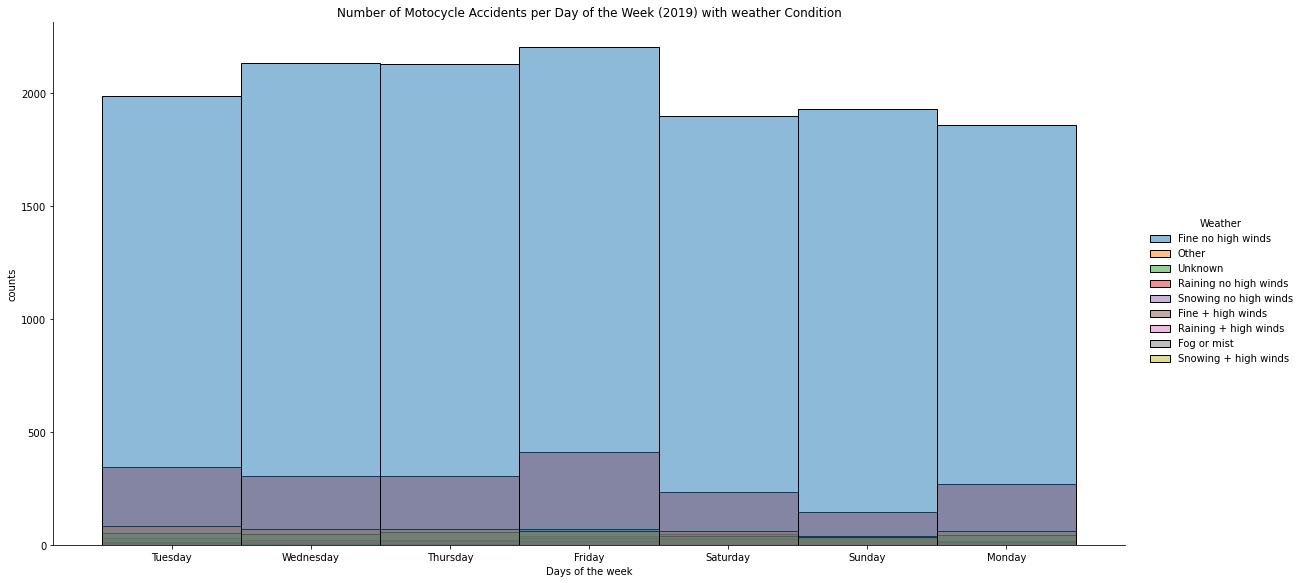

<Figure size 1440x1080 with 0 Axes>

In [136]:

sns.displot(data=motorbikes,x="Day_of_Week", hue="Weather", height=8, aspect=12/6,   palette=sns.color_palette("tab10", n_colors=9))
plt.title("Number of Motocycle Accidents per Day of the Week (2019) with weather Condition")
plt.ylabel("counts")
plt.xlabel("Days of the week")
plt.figure(figsize = (20,15))

plt.show
plt.savefig('accidentspero.png')


# **Motocycle accident per time**

<function matplotlib.pyplot.show>

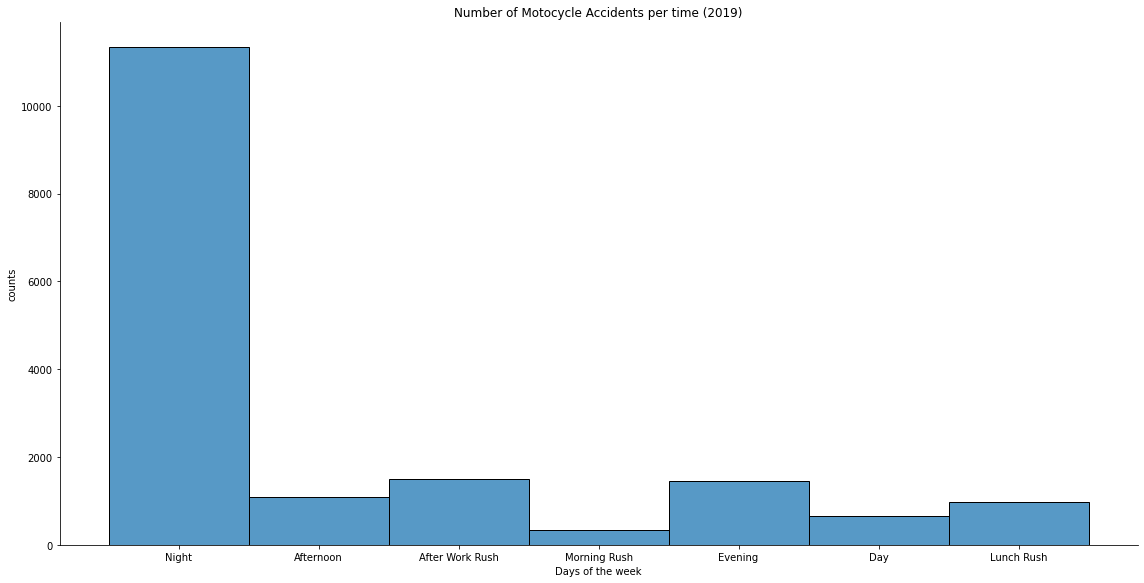

In [54]:

sns.displot(data=motorbikes,x="Time_Group", height=8, aspect=12/6)
plt.title("Number of Motocycle Accidents per time (2019)")
plt.ylabel("counts")
plt.xlabel("Days of the week")
# plt.figure(figsize = (20,15))
plt.show

## **(C)	For Pedestrian, are there significant hours of the day, and days of the week, on which accidents occur?**

In [55]:
acc_cas = accident_decoded.merge(casualities_decoded, on="Accident_Index")

In [56]:
#dataframe for Pedestrian
df_casu= acc_cas[(acc_cas['Casualty_Type']=="Pedestrian")]

In [57]:
df_casu[["Day_of_Week","Casualty_Type"]]

,Day_of_Week,Casualty_Type
5,Tuesday,Pedestrian
11,Tuesday,Pedestrian
19,Tuesday,Pedestrian
20,Tuesday,Pedestrian
21,Tuesday,Pedestrian
...,...,...
153108,Saturday,Pedestrian
153113,Wednesday,Pedestrian
153131,Friday,Pedestrian
153132,Tuesday,Pedestrian


Pedestrian accident by Day of the week

<function matplotlib.pyplot.show>

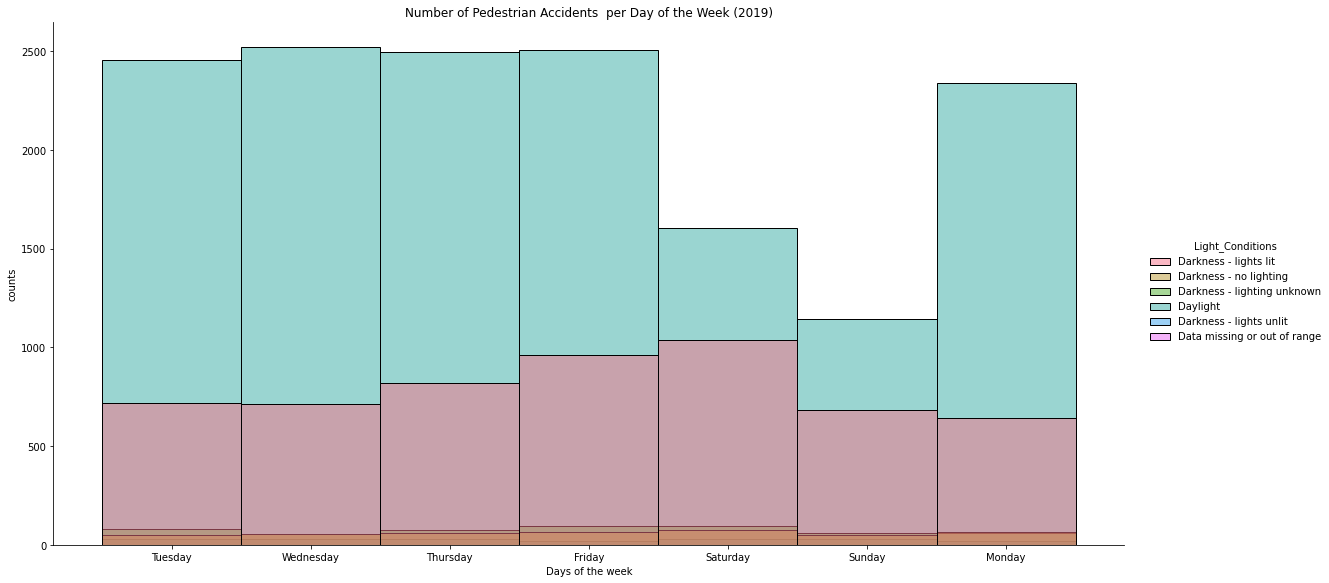

<Figure size 1440x1080 with 0 Axes>

In [58]:
# sns.barplot(x='Accident_Index', y='Day_of_Week', data=acc_vec.groupby('Vehicle_Type')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index'))
sns.displot(data=df_casu,x="Day_of_Week", height=8, aspect=12/6,  hue="Light_Conditions", palette=sns.color_palette("husl", n_colors=6))
plt.title("Number of Pedestrian Accidents  per Day of the Week (2019)")
plt.ylabel("counts")
plt.xlabel("Days of the week")
plt.figure(figsize = (20,15))
plt.show

Pedestrian accident by Time of the day

<function matplotlib.pyplot.show>

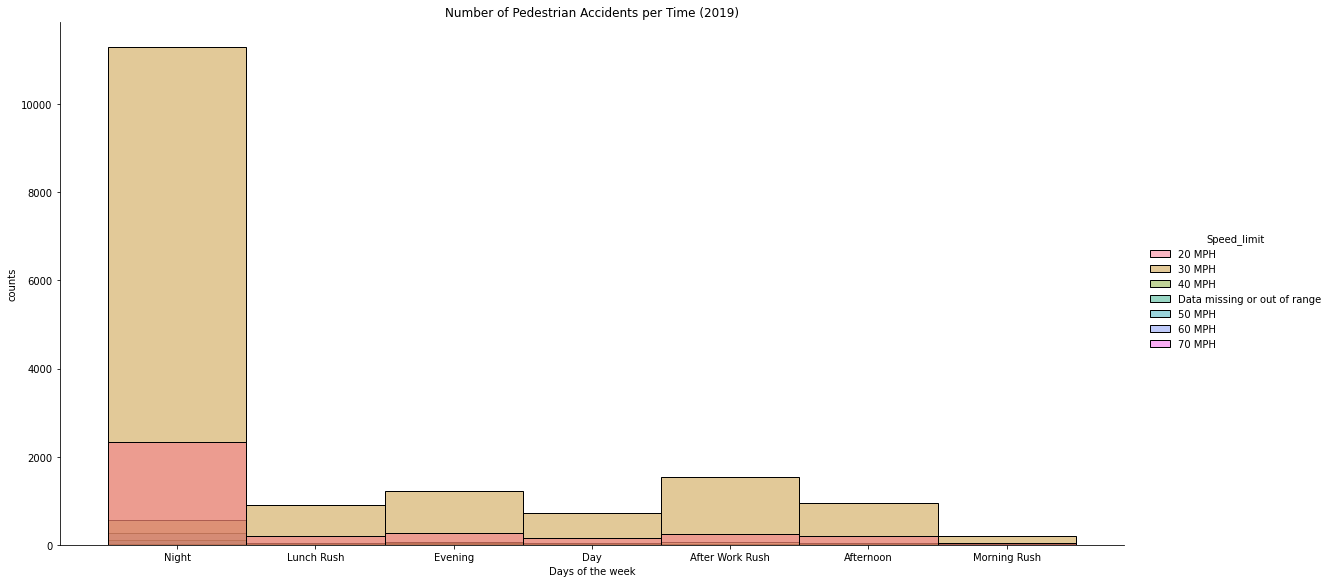

<Figure size 1440x1080 with 0 Axes>

In [59]:
sns.displot(data=df_casu,x="Time_Group", height=8, aspect=12/6,  hue="Speed_limit", palette=sns.color_palette("husl", n_colors=7))
plt.title("Number of Pedestrian Accidents per Time (2019)")
plt.ylabel("counts")
plt.xlabel("Days of the week")
plt.figure(figsize = (20,15))
plt.show

## **(d)	What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?**

In [60]:
from datetime import datetime, date
accident['formatted_date'] = pd.to_datetime(accident['Date'])
accident['day_of_year'] = accident.formatted_date.apply(lambda x: x.dayofyear)
accident['week_of_year'] = accident.formatted_date.apply(lambda x: x.weekofyear)

# accident['Week_Number'] = accident['Date'].dt.week



[Text(0, 0.5, 'Number of Accidents'), Text(0.5, 0, 'Weeks')]

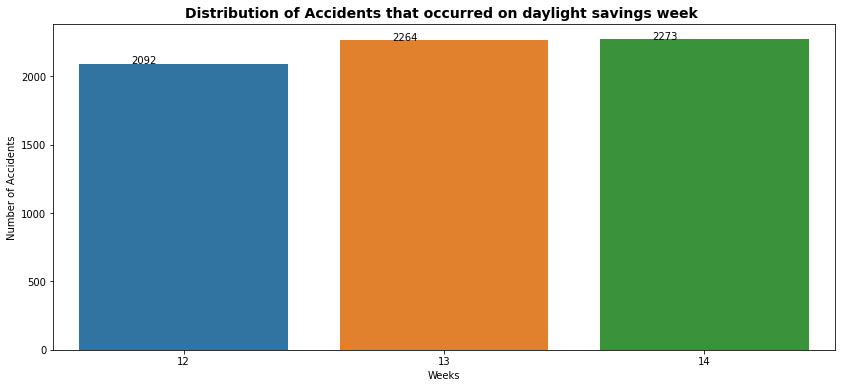

In [135]:
daylight_starts = accident[(accident['week_of_year'] == 12) | (accident['week_of_year'] == 13) | (accident['week_of_year'] == 14) ]
fig, ax = plt.subplots(figsize=(14,6))
# plot
ax = sns.countplot(daylight_starts['week_of_year'])
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01))
ax.set_title('Distribution of Accidents that occurred on daylight savings week ', fontsize=14, fontweight='bold')
ax.set(xlabel='Weeks', ylabel='Number of Accidents')

[Text(0, 0.5, 'Number of Accidents'), Text(0.5, 0, 'Weeks')]

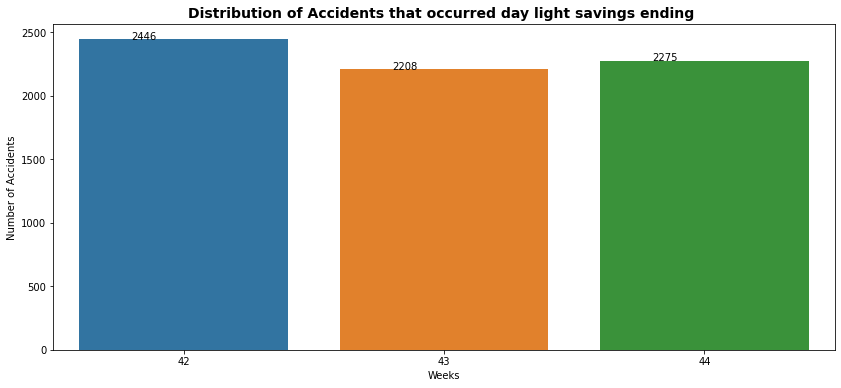

In [62]:
daylight_ends = accident[(accident['week_of_year'] == 42) | (accident['week_of_year'] == 43) | (accident['week_of_year'] == 44) ]
fig, ax = plt.subplots(figsize=(14,6))
# plot
ax = sns.countplot(daylight_ends['week_of_year'])
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01))
ax.set_title('Distribution of Accidents that occurred day light savings ending ', fontsize=14, fontweight='bold')
ax.set(xlabel='Weeks', ylabel='Number of Accidents')

### **(e)	What impact, if any, does sunrise and sunset times have on road traffic accidents?**

In [63]:
#Viewing my rounded up time
accident['Converted_Time']

0         17
1         21
2          1
3          1
4          0
          ..
117531     1
117532     8
117533    15
117534    14
117535    12
Name: Converted_Time, Length: 117536, dtype: int64

In [64]:
sunrise_time=accident[((accident["Converted_Time"] >= 6.0 )&(accident["Converted_Time"] <= 6.05))] # since sunrise duration only lasts 3 minutes

In [65]:
Sun_time=((sunrise_time['Number_of_Casualties'].sum())/(accident['Number_of_Casualties'].sum()))*100

In [66]:
print("sunrise Impact on road traffic is: {:.2f} % ".format(Sun_time))

sunrise Impact on road traffic is: 1.94 % 


In [67]:
Sun_Set=accident[((accident["Converted_Time"] >= 18.0 ))] 

In [68]:
sunset_time=((Sun_Set['Number_of_Casualties'].sum())/(accident['Number_of_Casualties'].sum()))*100

In [69]:
print("sunset Impact on road traffic is: {:.2f} % ".format(sunset_time))

sunset Impact on road traffic is: 24.83 % 


In [70]:
# now we append them into one dataframe
sunrise_sunset=sunrise_time.append(Sun_Set)

In [71]:
total_rise_set=((sunrise_sunset['Number_of_Casualties'].sum())/(accident['Number_of_Casualties'].sum()))*100

In [72]:
print("Impact of sunrise and sunset on road traffic is: {:.2f} % ".format(total_rise_set))

Impact of sunrise and sunset on road traffic is: 26.77 % 


## **(f)	Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?**

In [73]:
engine_Age = Vehicles[['Engine_Capacity_(CC)','Age_of_Vehicle']]

In [74]:
features = ["Engine_Capacity_(CC)",	"Age_of_Vehicle"]

In [75]:
x = Vehicles.loc[:, features].values

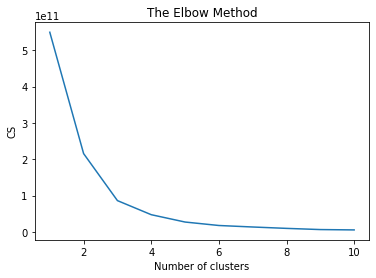

In [76]:
# Elow method to determine the right amount of number of clusters to use
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [77]:
kmeans = KMeans(n_clusters=3)

In [78]:
x

array([[  -1,   -1],
       [  -1,   -1],
       [  -1,   -1],
       ...,
       [2967,    5],
       [1597,    6],
       [ 599,   20]])

In [79]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [80]:
Label = kmeans.predict(x)
centriod = kmeans.cluster_centers_

In [81]:
Label

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [82]:
centriod

array([[5.08199069e+01, 5.42458564e-01],
       [1.72886851e+03, 7.93698959e+00],
       [9.73469729e+03, 6.33924375e+00]])

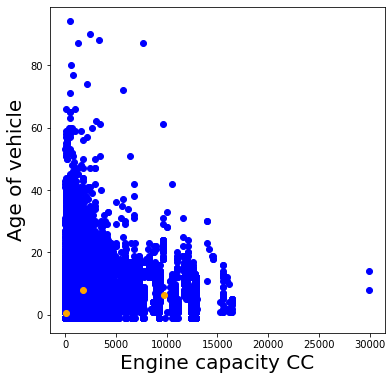

In [83]:
fig = plt.figure(figsize=(6,6))
colors = map(lambda x: colmap[x+1], Label)
plt.xlabel('Engine capacity CC',fontdict = {'fontsize' : 20})
plt.ylabel('Age of vehicle',fontdict = {'fontsize' : 20})
plt.scatter(engine_Age['Engine_Capacity_(CC)'],engine_Age['Age_of_Vehicle'],color="blue")
plt.scatter(centriod[:,0],centriod[:,1],color="orange")
plt.show()

## **(g)	Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?**

# Using K-means Clustering

In [84]:
speed_weather = accident[['Speed_limit','Weather']]

In [85]:
feature = ['Speed_limit','Weather']

In [86]:
 cond =accident.loc[:, feature].values

In [87]:
speed_weather.head()

,Speed_limit,Weather
0,30,1
1,30,1
2,30,1
3,20,1
4,30,1


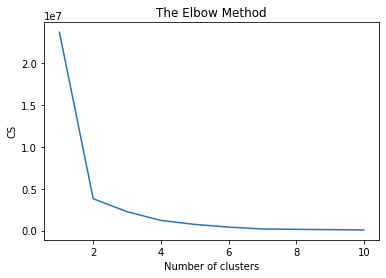

In [88]:
# Elow method to determine the right amount of number of clusters to use
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(cond)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [89]:
kmean=KMeans(n_clusters=2)
kmean.fit(cond)

KMeans(n_clusters=2)

In [90]:
Labels = kmean.predict(cond)
Centroids = kmean.cluster_centers_
Labels
Centroids

array([[29.78344103,  1.67171678],
       [60.92370087,  1.58878823]])

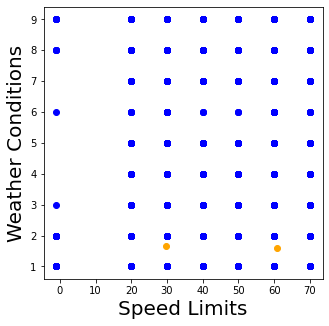

In [91]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], Labels)
plt.scatter(accident['Speed_limit'],accident['Weather'],color="blue")
plt.scatter(Centroids[:,0],Centroids[:,1],color="orange")
plt.xlabel('Speed Limits',fontdict = {'fontsize' : 20})
plt.ylabel('Weather Conditions',fontdict = {'fontsize' : 20})
plt.show()

# Using Density based clustering (DBSCAN) to determine accident hotspts





In [92]:
#Trying to get the highest number of occuring Accident location
accident['LSOA_of_Accident_Location'].value_counts()

unknown      5714
E01032739     194
E01004736     119
E01033595      93
E01002444      72
             ... 
E01022785       1
E01008038       1
E01017072       1
E01008003       1
W01000485       1
Name: LSOA_of_Accident_Location, Length: 27763, dtype: int64

In [93]:
City = accident[accident['LSOA_of_Accident_Location'] == 'E01032739'] # Investigating City and Westminster 
Westminster = accident[accident['LSOA_of_Accident_Location'] == 'E01004736']

df_ = pd.concat([City, Westminster], axis = 0)

In [94]:
def greatcircle(x,y):
    lat1, long1 = x[0], x[1]
    lat2, long2 = y[0], y[1]
    dist = great_circle((lat1,long1),(lat2,long2)).meters
    return dist

In [95]:
eps = 100 #distance in meters
min_samples = 10

df_dbc = df_

loc = df_dbc[['Latitude','Longitude']]

dbc = dbscan(eps = eps, min_samples = min_samples, metric=greatcircle).fit(loc)

labels = dbc.labels_
unique_labels = np.unique(dbc.labels_)

print(unique_labels)

df_dbc['Cluster'] = labels

[-1  0  1  2  3  4  5  6  7]


In [96]:
location = df_dbc['Latitude'].mean(), df_dbc['Longitude'].mean()

m = folium.Map(location=location,zoom_start=13)

folium.TileLayer('cartodbpositron').add_to(m)

clust_colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

for i in range(0,len(df_dbc)):
    colouridx = df_dbc['Cluster'].iloc[i]
    if colouridx == -1:
        pass
    else:
        col = clust_colours[colouridx%len(clust_colours)]
        folium.CircleMarker([df_dbc['Latitude'].iloc[i],df_dbc['Longitude'].iloc[i]], radius = 10, color = col, fill = col).add_to(m)

m

## **Using Associate Pattern Mining**

In [97]:
from typing import Pattern
pattern1 = pd.get_dummies(accident.Accident_Severity, prefix='Severity')
pattern2 = pd.get_dummies(accident.Speed_limit, prefix='Speed Limit')
pattern3 = pd.get_dummies(accident.Weather, prefix='Weather Conditions')

In [98]:
combine = [pattern1,pattern2,pattern3]
combined =pd.concat(combine, axis=1)
combined

,Severity_1,Severity_2,Severity_3,Speed Limit_-1,Speed Limit_20,Speed Limit_30,Speed Limit_40,Speed Limit_50,Speed Limit_60,Speed Limit_70,Weather Conditions_1,Weather Conditions_2,Weather Conditions_3,Weather Conditions_4,Weather Conditions_5,Weather Conditions_6,Weather Conditions_7,Weather Conditions_8,Weather Conditions_9
0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
117532,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
117533,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
117534,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [99]:
apriori(combined,min_support=0.4,use_colnames=True)

,support,itemsets
0,0.786619,(Severity_3)
1,0.589649,(Speed Limit_30)
2,0.785427,(Weather Conditions_1)
3,0.474459,"(Severity_3, Speed Limit_30)"
4,0.614169,"(Weather Conditions_1, Severity_3)"
5,0.465236,"(Weather Conditions_1, Speed Limit_30)"


In [100]:
frequent_itemset =apriori(combined,min_support=0.4,use_colnames=True)

In [101]:
rules = association_rules(frequent_itemset,metric='lift',min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Severity_3),(Speed Limit_30),0.786619,0.589649,0.474459,0.603163,1.022918,0.010630,1.034053
1,(Speed Limit_30),(Severity_3),0.589649,0.786619,0.474459,0.804646,1.022918,0.010630,1.092282
2,(Weather Conditions_1),(Severity_3),0.785427,0.786619,0.614169,0.781955,0.994072,-0.003663,0.978614
3,(Severity_3),(Weather Conditions_1),0.786619,0.785427,0.614169,0.780771,0.994072,-0.003663,0.978762
4,(Weather Conditions_1),(Speed Limit_30),0.785427,0.589649,0.465236,0.592335,1.004555,0.002110,1.006588
5,(Speed Limit_30),(Weather Conditions_1),0.589649,0.785427,0.465236,0.789005,1.004555,0.002110,1.016956


### **H) How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?**

Using SelectKBest METHOD! 

In [102]:
predictors = ['Age_of_Driver','Journey Purpose','Sex_of_Driver','Age_of_Vehicle','Day_of_Week']

In [103]:
Vehicle_and_Accidents=accident.merge(Vehicles, on=['Accident_Index'], how='inner')

In [104]:
dataframe = Vehicle_and_Accidents.dropna()
dataframe.reset_index(drop=True)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey Purpose,Sex_of_Driver,Age_of_Driver,Age Band,Engine_Capacity_(CC),Vehicle Propulsion Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,5,1,78,11,1597,2,6,8,3,8


In [105]:
dataframe = dataframe.filter( ['Age_of_Driver','Journey Purpose','Accident_Severity','Sex_of_Driver','Age_of_Vehicle','Day_of_Week'], axis=1)
dataframe

,Age_of_Driver,Journey Purpose,Accident_Severity,Sex_of_Driver,Age_of_Vehicle,Day_of_Week
0,58,6,3,1,-1,2
1,-1,6,3,3,-1,2
2,24,6,3,2,-1,3
3,-1,6,3,3,-1,3
4,45,6,3,1,-1,3
...,...,...,...,...,...,...
216376,20,1,3,1,4,5
216377,33,6,3,1,12,6
216378,61,6,3,1,5,6
216379,78,5,3,1,6,7


In [106]:
df = dataframe[(dataframe['Age_of_Driver'] > 0) & (dataframe['Journey Purpose'] > 0) & (dataframe['Sex_of_Driver'] > 0) & (dataframe['Age_of_Vehicle'] > 0)& (dataframe['Day_of_Week'] > 0)]
df

,Age_of_Driver,Journey Purpose,Accident_Severity,Sex_of_Driver,Age_of_Vehicle,Day_of_Week
15,81,6,3,2,4,3
21,33,1,1,1,4,3
24,30,1,2,1,1,3
105,23,6,3,1,1,4
181,25,1,2,1,1,5
...,...,...,...,...,...,...
216376,20,1,3,1,4,5
216377,33,6,3,1,12,6
216378,61,6,3,1,5,6
216379,78,5,3,1,6,7


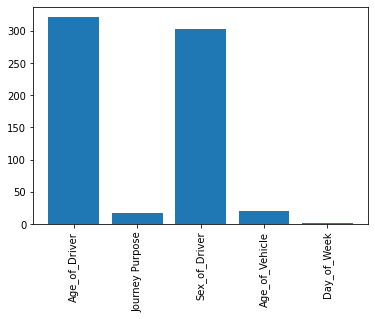

In [107]:
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(dataframe[predictors], dataframe["Accident_Severity"])

# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)
# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## **(i)	Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models?**

In [108]:
#Mergin accident,casualities and Vehicle datasets together to get the correlation to accident severity
my_data = accident.merge(Vehicles, on="Accident_Index")

In [109]:
all_data = my_data.merge(casualities, on="Accident_Index")

In [110]:
all_data.isnull().sum()

Accident_Index                 0
Location_Easting_OSGR          0
Location_Northing_OSGR         0
Longitude                      0
Latitude                       0
                              ..
Bus Passenger                  0
Ped Road Maintenance Worker    0
Casualty_Type                  0
Home Area Type                 0
IMD Decile                     0
Length: 73, dtype: int64

In [134]:
#correlation by accident severity using pearson
corrdf=all_data.apply(LabelEncoder().fit_transform)
sc = StandardScaler()
corrdf = sc.fit_transform(corrdf)
corrdf=pd.DataFrame(data=corrdf,columns=all_data.columns)
corr=corrdf.corr()["Accident_Severity"]
corr[np.argsort(corr,axis=0)[::-1]]



Accident_Severity        1.000000
Casualty_Severity        0.826459
Police Officer Attend    0.154321
Sex_of_Driver            0.082202
2nd_Road_Class           0.071022
                           ...   
Vehicle_Manoeuvre       -0.125144
Casualty_Reference      -0.126162
Speed_limit             -0.139709
Urban Rural             -0.141979
Number_of_Casualties    -0.180308
Name: Accident_Severity, Length: 73, dtype: float64

In [112]:
Features = ["Accident_Severity","Casualty_Severity","Police Officer Attend","Sex_of_Driver","2nd_Road_Class","Location_Easting_OSGR","Longitude","Junction_Control","Weather","Casualty_Type","Junction_Detail","2nd_Road_Number","Vehicle Propulsion Code","Ped Cross - Physical","Journey Purpose","1st_Road_Class","Vehicle_Type","Number_of_Vehicles","Engine_Capacity_(CC)","Day_of_Week","Junction_Location","1st_Point_of_Impact"]

In [113]:
Features

['Accident_Severity',
 'Casualty_Severity',
 'Police Officer Attend',
 'Sex_of_Driver',
 '2nd_Road_Class',
 'Location_Easting_OSGR',
 'Longitude',
 'Junction_Control',
 'Weather',
 'Casualty_Type',
 'Junction_Detail',
 '2nd_Road_Number',
 'Vehicle Propulsion Code',
 'Ped Cross - Physical',
 'Journey Purpose',
 '1st_Road_Class',
 'Vehicle_Type',
 'Number_of_Vehicles',
 'Engine_Capacity_(CC)',
 'Day_of_Week',
 'Junction_Location',
 '1st_Point_of_Impact']

In [114]:
data_s = all_data.filter(Features,  axis=1)

In [115]:
data_set = data_s[ (data_s["Casualty_Severity"] > 0) & (data_s["Police Officer Attend"] > 0) & (data_s["Sex_of_Driver"] > 0) & (data_s["2nd_Road_Class"] > 0) & (data_s["Location_Easting_OSGR"] > 0) & (data_s["Longitude"] > 0) & (data_s["Weather"] > 0) & (data_s["Casualty_Type"] > 0) & (data_s["Junction_Detail"] > 0) & (data_s["2nd_Road_Number"] > 0) & (data_s["Vehicle Propulsion Code"] > 0) & (data_s["Ped Cross - Physical"] > 0) &  (data_s["Journey Purpose"] > 0) &(data_s["1st_Road_Class"] > 0) &(data_s["Vehicle_Type"] > 0) & (data_s["Number_of_Vehicles"] > 0) & (data_s["Engine_Capacity_(CC)"] > 0) & (data_s["Day_of_Week"] > 0) & (data_s["Junction_Location"] > 0) & (data_s["1st_Point_of_Impact"] > 0) ]

In [116]:
# (data_s["Accident_Severity"] > 0) &

In [117]:
y = data_set["Accident_Severity"].values

In [118]:
X = data_set.drop("Accident_Severity", axis=1)

In [119]:
X

,Casualty_Severity,Police Officer Attend,Sex_of_Driver,2nd_Road_Class,Location_Easting_OSGR,Longitude,Junction_Control,Weather,Casualty_Type,Junction_Detail,...,Vehicle Propulsion Code,Ped Cross - Physical,Journey Purpose,1st_Road_Class,Vehicle_Type,Number_of_Vehicles,Engine_Capacity_(CC),Day_of_Week,Junction_Location,1st_Point_of_Impact
37,3,1,2,3,548535.0,0.141957,2,1,9,6,...,1,5,6,3,9,2,1242,3,1,1
38,3,1,3,3,548535.0,0.141957,2,1,9,6,...,1,5,6,3,9,2,998,3,2,1
5435,3,1,1,3,544323.0,0.081986,2,1,9,6,...,2,8,6,5,9,2,1999,3,8,1
5436,3,1,1,3,544323.0,0.081986,2,1,9,6,...,1,8,1,5,9,2,1348,3,8,3
5914,2,1,1,3,548455.0,0.141210,2,1,3,6,...,1,5,6,3,3,2,125,7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244012,3,1,1,3,574579.0,0.482353,4,1,9,1,...,1,1,6,3,9,2,998,3,8,2
244473,3,2,2,4,583682.0,0.609392,2,1,9,6,...,1,5,6,3,9,2,1390,5,1,1
244474,3,2,2,4,583682.0,0.609392,2,1,9,6,...,1,5,6,3,9,2,1390,5,1,1
244475,3,2,2,4,583682.0,0.609392,2,1,9,6,...,2,5,6,3,9,2,1997,5,1,2


In [120]:
y

array([3, 3, 3, ..., 3, 3, 3])

In [121]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

In [122]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x_train, y_train)

In [123]:
predictions_clf = clf.predict(x_test)
print(predictions_clf)

[3 3 2 3 3 2 3 3 3 3 2 2 2 3 2 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 2 2 2 3 3 3 3
 2 3 3 3 3 3 3 2 3 2 3 3 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 2 3 3 2 3 2 3 2 2 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 2 3
 3 3 2 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 2 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 2 3
 3 3 3 2 3 2 3 3 3 3 3 3 3 2 3 2 2 3 3 3 3 3 3 3 3 2 2 3 3 2 3 3 3 2 2 3 2
 2 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 2]


In [124]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test, predictions_clf)
print(acc)

0.9644012944983819


In [125]:
%%time
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

# making predictions on the testing set

y_pred = gnb.predict(x_test)

# comparing actual response values (y_test) with predicted response values (y_pred)

from sklearn import metrics

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 82.20064724919094
CPU times: user 10.1 ms, sys: 0 ns, total: 10.1 ms
Wall time: 11.1 ms


In [126]:
#Import Random Forest Model
%%time
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)
#After training, check the accuracy using actual and predicted values.

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9773462783171522
CPU times: user 227 ms, sys: 6.68 ms, total: 234 ms
Wall time: 317 ms


In [127]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot


In [128]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [129]:
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['lr'] = LogisticRegression()
    models['bayes'] = GaussianNB()
    models['stacked'] = get_stacking()
    return models

In [132]:
#Grab hold of the dataset.
# X, y = get_dataset()
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.973 (0.019)
>knn 0.870 (0.027)
>lr 0.844 (0.005)
>bayes 0.841 (0.019)
>stacked 0.973 (0.020)


In [131]:
from sklearn.ensemble import StackingClassifier

def get_stacking():
    level0 = list()
    level0.append(('dtree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))

    level1 = LogisticRegression()

    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model